# Homework 2

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [2]:
city = 'Beijing'
file = city + 'PM20100101_20151231.csv'

df = pd.read_csv('./data/' + file, index_col=1, usecols=[0, 1, 2, 3, 4, 10],
                 parse_dates={'Datetime': [1, 2, 3, 4]},
                 date_parser=lambda x: pd.datetime.strptime(x, '%Y %m %d %H'))

## Selecting data

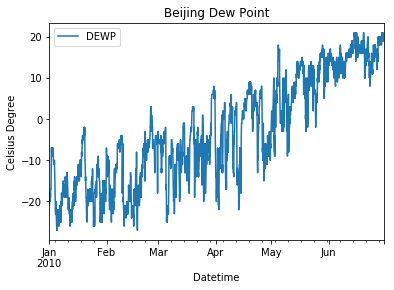

In [3]:
df = df[df['Datetime'] < pd.to_datetime('2010-06-30 23:59:59', format='%Y %m %d %H')]

df.plot(x='Datetime', y='DEWP', title=city + ' Dew Point').set_ylabel('Celsius Degree')

## Training Linear Regression model with Cross-Validation

In [5]:
df['DatetimeNumeric'] = pd.to_numeric(df['Datetime'] - df['Datetime'].iloc[0]).values / 10 ** 12

X = [[x] for x in df['DatetimeNumeric'].values]
y = df['DEWP'].values

In [7]:
lr = linear_model.LinearRegression()
model = lr.fit(X, y)
predicted = cross_val_predict(lr, X, y, cv=10)

# Show accuracy score 
model.score(X, y)

0.77418754871100981

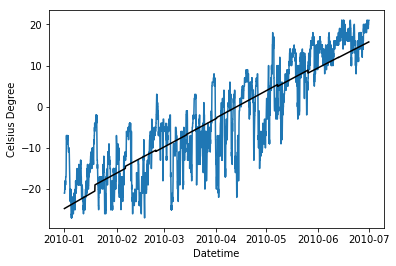

In [8]:
fig, ax = plt.subplots()
ax.plot(df['Datetime'].values, y)
ax.plot(df['Datetime'].values, predicted, color='k')
ax.set_xlabel('Datetime')
ax.set_ylabel('Celsius Degree')
plt.show()